In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import os

load the audio file as a timeseries in y and store sampling rate as sr(measured in Hz)
default sr is 22kHz

In [2]:
def getFeatures(path):
    y, sr = librosa.load(path)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)


    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_delta = librosa.feature.delta(mfcc)
    
    features = []
    features.append(tempo)
    features.append(np.sum(beats))
    features.append(np.mean(chroma_stft))
    features.append(np.mean(rms))
    features.append(np.mean(cent))
    features.append(np.mean(spec_bw))
    features.append(np.mean(rolloff))
    features.append(np.mean(zcr))
    for coefficient in mfcc:
        features.append(np.mean(coefficient))
    return features   

## Dataset:
1. Our training dataset can be found [here](https://iiitaphyd-my.sharepoint.com/personal/devansh_manu_research_iiit_ac_in/_layouts/15/onedrive.aspx?originalPath=aHR0cHM6Ly9paWl0YXBoeWQtbXkuc2hhcmVwb2ludC5jb20vOmY6L2cvcGVyc29uYWwvZGV2YW5zaF9tYW51X3Jlc2VhcmNoX2lpaXRfYWNfaW4vRWxZZm1zQ3h0Q2xJcjJLSVBqcWEzYUFCdFVva2xha2cwNnBCMDJMMmlKaWVIdz9ydGltZT1UNjRHc1lqQzEwZw&viewid=5db72c70%2D223f%2D4887%2Dbf50%2Dbd0fbf14638f&id=%2Fpersonal%2Fdevansh%5Fmanu%5Fresearch%5Fiiit%5Fac%5Fin%2FDocuments%2FMMT%20%2D%20Hands%20on%20activity%2FEmotion%20Classification)
2. From the above link, we picked up the Arousal and Valence data.
3. From [this](https://onedrive.live.com/?authkey=%21ABJMt2rGTQvCxyM&id=3E1ACB43A24F0BDA%21352&cid=3E1ACB43A24F0BDA) link, we picked up the already-annotated Tension data.
4. Training of our model was done on the above mentioned Arousal, Valence and Tension dataset. 
5. Our testing, which you would see at the end of this notebook, is done on the un-annotated data mentioned in this [link](https://onedrive.live.com/?authkey=%21ABJMt2rGTQvCxyM&id=3E1ACB43A24F0BDA%21122&cid=3E1ACB43A24F0BDA)

Get training data-directory names

In [3]:
feature_set, y_labels = [], []
dir_list = ["../emotion_dataset/training/Arousal/", "../emotion_dataset/training/Valence/", "../emotion_dataset/training/Tension/"]

In [4]:
os.getcwd()

'/home/laferrari/IIIT-H SEMESTERS/8th_sem/Music, Mind and Technology/assignment2/src'

Extracting features for Arousal and Valence music tracks

In [5]:
for i in range(2):
    dirName1, dirName2 = dir_list[i]+"Positive/", dir_list[i]+"Negative/"
    dirContents = os.listdir(dirName1)
    temp_y_label = "A"
    if i == 1:
        temp_y_label = "V"
    for music in dirContents:
        currSongFeatures = getFeatures(dirName1+music)
        y_labels.append(temp_y_label+"P")
        feature_set.append(currSongFeatures)
    dirContents = os.listdir(dirName2)    
    for music in dirContents:
        currSongFeatures = getFeatures(dirName2+music)
        y_labels.append(temp_y_label+"N")
        feature_set.append(currSongFeatures)

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

This <font color="red">warning</font> will always occur when loading mp3 because libsndfile does not (yet/currently) support the mp3 format. Librosa tries to use libsndfile first, and if that fails, it will fall back on the audioread package, which is a bit slower and more brittle, but supports more formats.

The types of labels gathered uptill now, i.e. Arousal and Valence(both can be positive and negative)

In [6]:
print(set(y_labels))

{'VN', 'AP', 'AN', 'VP'}


In [7]:
dirName = dir_list[-1]
dirContents = os.listdir(dirName)
for music in dirContents:
    temp_y_label = music.split("_")[-1][:2]
    if temp_y_label == "TN" or temp_y_label == "TP":
        currSongFeatures = getFeatures(dirName+music)
        feature_set.append(currSongFeatures)
        y_labels.append(temp_y_label)

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161:

In [8]:
print(len(y_labels))
print(len(feature_set))

189
189


In [9]:
print(set(y_labels))

{'VN', 'TN', 'AP', 'AN', 'VP', 'TP'}


In [10]:
feature_set = np.array(feature_set)

In [11]:
feature_set.shape

(189, 28)

In [12]:
y = np.array(y_labels)
y.shape

(189,)

Plotting the distribution of classes in our entire training dataset

(array([28.,  0., 24.,  0., 18.,  0., 11.,  0., 54., 54.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

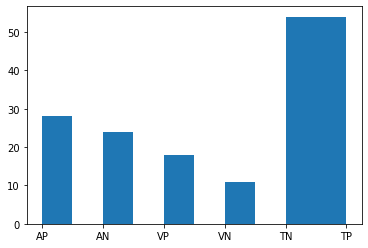

In [13]:
plt.hist(y)

We can clearly see that the training dataset is itself heavily biased w.r.t. the classes TN and TP

In [14]:
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Classes are: ", uniqueValues)
print("Frequency of each class is: ", occurCount)

Classes are:  ['AN' 'AP' 'TN' 'TP' 'VN' 'VP']
Frequency of each class is:  [24 28 54 54 11 18]


In [16]:
numExamplesPerClass = min(occurCount)
numExamplesPerClass

11

therefore, the minimum number of examples that a class has is 11(in this case, VN class has the minimum number of samples, i.e. 11)

In [18]:
tn_count, tp_count, vn_count, vp_count, an_count, ap_count = 0, 0, 0, 0, 0, 0
new_y_labels = []
new_feature_set = []
for l in range(len(y_labels)):
    if y_labels[l] == 'TN' and tn_count < numExamplesPerClass:
        new_y_labels.append(y_labels[l])
        new_feature_set.append(feature_set[l])
        tn_count += 1
    if y_labels[l] == 'TP' and tp_count < numExamplesPerClass:
        new_y_labels.append(y_labels[l])
        new_feature_set.append(feature_set[l])
        tp_count += 1
    if y_labels[l] == 'AP' and ap_count < numExamplesPerClass:
        new_y_labels.append(y_labels[l])
        new_feature_set.append(feature_set[l])
        ap_count += 1
    if y_labels[l] == 'AN' and an_count < numExamplesPerClass:
        new_y_labels.append(y_labels[l])
        new_feature_set.append(feature_set[l])
        an_count += 1
    if y_labels[l] == 'VN' and vn_count < numExamplesPerClass:
        new_y_labels.append(y_labels[l])
        new_feature_set.append(feature_set[l])
        vn_count += 1
    if y_labels[l] == 'VP' and vp_count < numExamplesPerClass:
        new_y_labels.append(y_labels[l])
        new_feature_set.append(feature_set[l])
        vp_count += 1

In [19]:
# tn_count, tp_count = 0, 0
# for l in range(81, len(y_labels)):
#     if y_labels[l] == 'TN' and tn_count < 20:
#         new_y_labels.append(y_labels[l])
#         new_feature_set = np.append(new_feature_set,[feature_set[l]], axis=0)
#         tn_count += 1
#     if y_labels[l] == 'TP' and tp_count < 20:
#         new_y_labels.append(y_labels[l])
#         new_feature_set = np.append(new_feature_set,[feature_set[l]], axis=0)
#         tp_count += 1

In [20]:
print(len(new_y_labels))
print(len(new_feature_set))

66
66


In [21]:
new_feature_set = np.array(new_feature_set)
new_feature_set.shape

(66, 28)

(array([11.,  0., 11.,  0., 11.,  0., 11.,  0., 11., 11.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

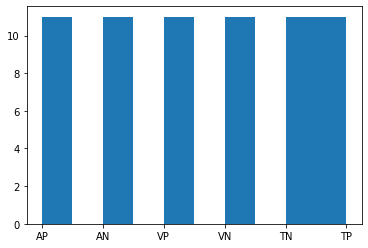

In [22]:
plt.hist(new_y_labels)

Now we have the same number of samples in each class, i.e. we have made the dataset balanced w.r.t. all classes

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, normalize

In [24]:
encoder = LabelEncoder()
encoder.fit(new_y_labels)
encoded_Y = encoder.transform(new_y_labels)
Y = to_categorical(encoded_Y)

In [25]:
# feature_list = ['tempo', 'beats', 'chromagram', 'rmse',
#            'centroid', 'bandwidth', 'rolloff', 'zcr', 'mfcc1', 'mfcc2',
#            'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
#            'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
#            'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

In [26]:
import seaborn as sns

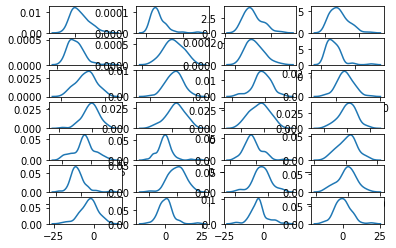

In [27]:
fig, axes = plt.subplots(ncols=4, nrows=7)

for i, ax in zip(range(28), axes.flat):
    sns.distplot(new_feature_set[:,i], hist=False, ax=ax)
plt.show()

In [28]:
import tensorflow as tf

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from sklearn.model_selection import train_test_split

## Model5: Neural Net
Use self-normalised exponential units as activation for all layers

In [30]:
clear_session()
model5 = Sequential()
model5.add(Dense(128, input_shape=(new_feature_set.shape[-1],), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal))
model5.add(Dense(128*2, activation='relu', kernel_initializer='normal'))
model5.add(Dense(128*4, activation='relu', kernel_initializer='normal'))
model5.add(Dense(128*8, activation='relu', kernel_initializer='normal'))
model5.add(Dense(128*16, activation='relu', kernel_initializer='normal'))
model5.add(Dense(128*32, activation='relu', kernel_initializer='normal'))
model5.add(Dense(128*64, activation='relu', kernel_initializer='normal'))
model5.add(Dense(128*128, activation='relu', kernel_initializer='normal'))    
model5.add(Dense(6, activation='softmax'))

In [31]:
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
dense_6 (Dense)              (None, 8192)              3

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])

In [57]:
x_train, x_val, y_train, y_val = train_test_split(new_feature_set, Y, test_size=0.15, random_state=12345)

In [37]:
result5 = model5.fit(x_train, y_train, batch_size=16, validation_data=[x_val, y_val], callbacks=[es], epochs=100)

Train on 56 samples, validate on 10 samples
Epoch 1/100
56/56 [==============================] - 7s 124ms/sample - loss: 0.5208 - acc: 0.8214 - val_loss: 4.2522 - val_acc: 0.2000
Epoch 2/100
56/56 [==============================] - 8s 143ms/sample - loss: 0.3101 - acc: 0.9286 - val_loss: 5.0576 - val_acc: 0.2000
Epoch 3/100
56/56 [==============================] - 8s 144ms/sample - loss: 0.3271 - acc: 0.8750 - val_loss: 5.0844 - val_acc: 0.3000
Epoch 4/100
56/56 [==============================] - 8s 142ms/sample - loss: 0.2924 - acc: 0.8929 - val_loss: 4.0197 - val_acc: 0.4000
Epoch 5/100
56/56 [==============================] - 6s 116ms/sample - loss: 0.3027 - acc: 0.9286 - val_loss: 4.2649 - val_acc: 0.3000
Epoch 6/100
56/56 [==============================] - 8s 144ms/sample - loss: 0.2856 - acc: 0.9286 - val_loss: 5.4152 - val_acc: 0.2000
Epoch 7/100
56/56 [==============================] - 8s 148ms/sample - loss: 0.2711 - acc: 0.9286 - val_loss: 4.5025 - val_acc: 0.2000
Epoch 8/100

## model 5 predictions:

### Get the testing data as mentioned above

In [38]:
testing_directory = "../emotion_dataset/testing/"
dirContents = os.listdir(testing_directory)
x_test, y_test = [], []
for music in dirContents:
    labelled_music = music.split('_')[1]
    if labelled_music[1] == 'P' or labelled_music[1] == 'N':
        music_features = getFeatures(testing_directory+music)
        x_test.append(music_features)
        y_test.append(labelled_music[:2])

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


NoBackendError: 

Check the shape of the testing data

In [ ]:
x_test = np.array(x_test)
x_test.shape

Collect the predicted output

In [ ]:
y_pred = []
for i in range(x_test.shape[0]):
    x_i = x_test[i].reshape(1, x_test[i].shape[0])
    y_i_pred = model5.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [ ]:
print(y_test)

In [ ]:
plt.hist(y_test)

In [ ]:
print(list(map(lambda x: x[0], y_pred)))

In [ ]:
plt.hist(list(map(lambda x: x[0], y_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [39]:
y_pred = []
for i in range(x_val.shape[0]):
    x_i = x_val[i].reshape(1, x_val[i].shape[0])
    y_i_pred = model5.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [40]:
print(len(y_pred))

10


In [41]:
print(y_pred)

[array(['AN'], dtype='<U2'), array(['VP'], dtype='<U2'), array(['VN'], dtype='<U2'), array(['VN'], dtype='<U2'), array(['VN'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['TP'], dtype='<U2'), array(['TN'], dtype='<U2'), array(['AN'], dtype='<U2'), array(['AN'], dtype='<U2')]


In [58]:
y_val_labelled = []
for i in y_val:
    t = encoder.inverse_transform([np.argmax(i)])
    y_val_labelled.append(t[0])

In [59]:
print(len(y_val_labelled))

10


(array([3., 0., 4., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

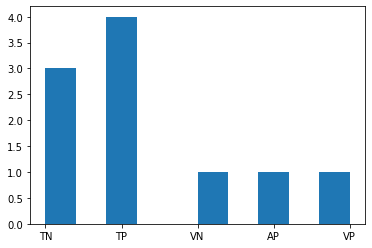

In [60]:
plt.hist(y_val_labelled)

(array([3., 0., 1., 0., 0., 3., 0., 2., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

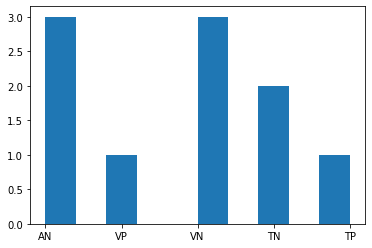

In [45]:
plt.hist(list(map(lambda x: x[0], y_pred)))

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val_labelled, y_pred)

0.2

## Gaussian Mixture Model

In [47]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)

In [48]:
result6 = gmm.fit(x_train, y_train)

In [49]:
y_val = result6.predict(x_val)

In [50]:
y_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Random Forest Classifier model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred = []
for i in range(x_val.shape[0]):
    x_i = x_val[i].reshape(1, x_val[i].shape[0])
    y_i_pred = rf.predict(x_i)
    y_i_pred = y_i_pred.reshape(y_i_pred.shape[-1],)
    y_i_pred = encoder.inverse_transform([np.argmax(y_i_pred)])
    y_pred.append(y_i_pred)

In [53]:
y_val_labelled = []
for i in y_val:
    t = encoder.inverse_transform([np.argmax(i)])
    y_val_labelled.append(t[0])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val_labelled, y_pred)

0.0

(array([3., 0., 4., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

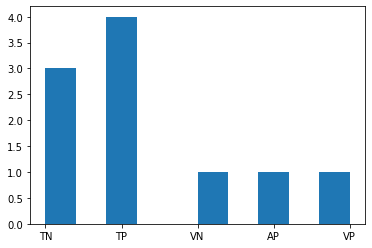

In [61]:
plt.hist(y_val_labelled)

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

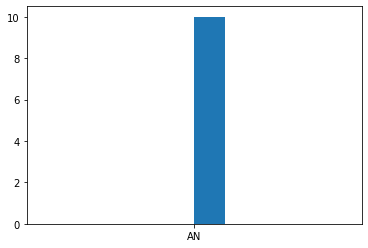

In [64]:
plt.hist(list(map(lambda x: x[0], y_pred)))

## SVM Model:

In [67]:
print(x_train.shape, y_train.shape)

(56, 28) (56, 6)


SVM can take the labelled-strings themselves as input, so no need to convert them into one-hot encoding

In [76]:
from sklearn.svm import SVC
model_svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
x_train, x_val, y_train, y_val = train_test_split(new_feature_set, new_y_labels, test_size=0.2, random_state=1234)
model_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(array([1., 0., 2., 0., 0., 5., 0., 3., 0., 3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

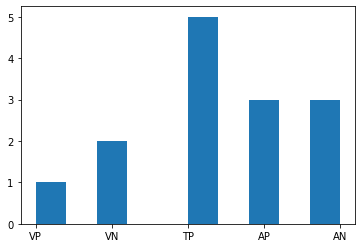

In [85]:
plt.hist(y_val)

In [91]:
y_pred_arr = []
for i in range(len(x_val)):
    y_pred = model_svm.predict([x_val[i]])
    y_pred_arr.append(y_pred)

In [92]:
print(len(y_pred_arr))

14


In [96]:
y_pred_arr

[array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2'),
 array(['TN'], dtype='<U2')]

In [94]:
accuracy_score(y_val, y_pred_arr)

0.0